# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



628

In [124]:
settings = {"units": "imperial", "appid": weather_api_key}


In [221]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid=1b530a1e3a52174247075e2463f00399&units={units}&q={city1}"
g_url = "http://api.openweathermap.org/data/2.5/weather?appid=1b530a1e3a52174247075e2463f00399&units={units}&q="


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [222]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(g_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

City not found. Skipping...
Processing Record 1 of Set 1 | klaksvik
Processing Record 2 of Set 1 | fomboni
Processing Record 3 of Set 1 | telde
Processing Record 4 of Set 1 | laela
City not found. Skipping...
Processing Record 5 of Set 1 | rikitea
City not found. Skipping...
Processing Record 6 of Set 1 | faanui
Processing Record 7 of Set 1 | huron
Processing Record 8 of Set 1 | yeppoon
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | grand river south east
Processing Record 13 of Set 1 | luderitz
Processing Record 14 of Set 1 | geraldton
Processing Record 15 of Set 1 | villanueva
Processing Record 16 of Set 1 | lazaro cardenas
Processing Record 17 of Set 1 | atuona
City not found. Skipping...
City not found. Skipping...
Processing Record 18 of Set 1 | odweyne
Processing Record 19 of Set 1 | leesburg
City not found. Skipping...
Processing Record 20 of Set 1 | rapsani
Processing Reco

Processing Record 38 of Set 4 | ixtapa
Processing Record 39 of Set 4 | pailon
Processing Record 40 of Set 4 | san rafael
Processing Record 41 of Set 4 | tabou
City not found. Skipping...
City not found. Skipping...
Processing Record 42 of Set 4 | lebu
Processing Record 43 of Set 4 | shimoda
Processing Record 44 of Set 4 | navahrudak
Processing Record 45 of Set 4 | poronaysk
Processing Record 46 of Set 4 | tikaitnagar
Processing Record 47 of Set 4 | okhotsk
Processing Record 48 of Set 4 | shakhtinsk
Processing Record 49 of Set 4 | poum
Processing Record 1 of Set 5 | kachug
City not found. Skipping...
Processing Record 2 of Set 5 | afua
Processing Record 3 of Set 5 | riyadh
Processing Record 4 of Set 5 | muros
Processing Record 5 of Set 5 | port hardy
City not found. Skipping...
Processing Record 6 of Set 5 | nueva londres
Processing Record 7 of Set 5 | amzya
Processing Record 8 of Set 5 | chara
Processing Record 9 of Set 5 | salalah
City not found. Skipping...
City not found. Skipping..

City not found. Skipping...
Processing Record 30 of Set 8 | mgandu
Processing Record 31 of Set 8 | aldan
Processing Record 32 of Set 8 | marovoay
City not found. Skipping...
Processing Record 33 of Set 8 | ngora
Processing Record 34 of Set 8 | kibala
Processing Record 35 of Set 8 | abha
Processing Record 36 of Set 8 | itarema
City not found. Skipping...
Processing Record 37 of Set 8 | moroni
Processing Record 38 of Set 8 | sao filipe
Processing Record 39 of Set 8 | trinidad
Processing Record 40 of Set 8 | bereda
Processing Record 41 of Set 8 | yulara
Processing Record 42 of Set 8 | ituporanga
Processing Record 43 of Set 8 | andreapol
City not found. Skipping...
City not found. Skipping...
Processing Record 44 of Set 8 | tecoanapa
City not found. Skipping...
Processing Record 45 of Set 8 | foz do iguacu
Processing Record 46 of Set 8 | elko
Processing Record 47 of Set 8 | zelenogorskiy
Processing Record 48 of Set 8 | ibanda
Processing Record 49 of Set 8 | xiashi
Processing Record 1 of Se

Processing Record 18 of Set 12 | calvinia
Processing Record 19 of Set 12 | rockport
Processing Record 20 of Set 12 | kathu
Processing Record 21 of Set 12 | camara de lobos
City not found. Skipping...
------------------------------
Data Retrieval Complete
------------------------------


In [223]:
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [244]:
weather_dataframe = pd.DataFrame(weather_dict)

In [245]:
weather_dataframe.to_csv('output_data/cities.csv')

In [246]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,klaksvik,40,FO,1580226463,71,62.23,-6.59,274.15,0.50
1,fomboni,99,KM,1580226463,72,-12.28,43.74,302.12,3.78
2,telde,0,ES,1580226463,60,27.99,-15.42,296.48,2.60
3,laela,100,TZ,1580226463,92,-8.57,32.05,292.11,2.24
4,rikitea,100,PF,1580226464,80,-23.12,-134.97,299.25,4.40


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

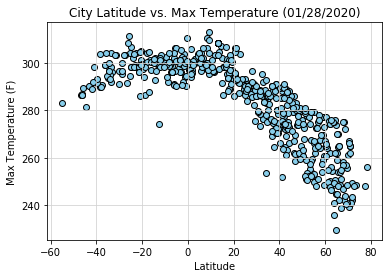

In [232]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/28/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()


#### Latitude vs. Humidity Plot

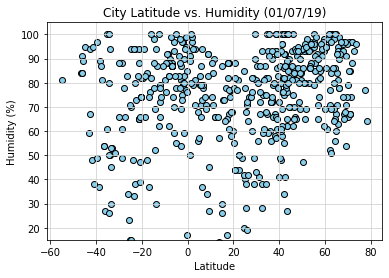

In [230]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/28/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.show()

#### Latitude vs. Cloudiness Plot

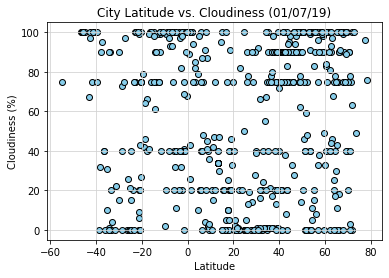

In [231]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/28/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

#### Latitude vs. Wind Speed Plot

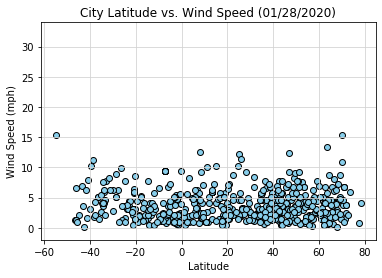

In [234]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/28/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression